# Обработка естественного языка с использованием NLTK

In [1]:
import nltk
import codecs
import matplotlib.pyplot as plt
from string import punctuation
from nltk.probability import FreqDist
from nltk.corpus import stopwords, gutenberg
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize, PunktSentenceTokenizer

С помощью модуля codecs прочитаем текстовый файл книги Джоан Коралин Роулинг "Гарри Поттер и кубок огня" с явным указанием кодировки в аргументе.

In [2]:
file = codecs.open('the_little_prince.txt', 'r', 'utf_8_sig')
text = file.read()

Выведем результат:

In [3]:
print(text[:190])

I

Once when I was six years old I saw a magnificent picture in a book, called True Stories from Nature, about the primeval forest.

It was a picture of a boa constrictor in the act of s


Уберем переносы строки и отступы, приведем текст к нижнему регистру:

In [4]:
text = text.replace('\r', '').replace('\n', '')
text = text.lower()
print(text[:190])

ionce when i was six years old i saw a magnificent picture in a book, called true stories from nature, about the primeval forest.it was a picture of a boa constrictor in the act of swallowin


## Анализ текста

Выведем количество символов в тексте:

In [5]:
len_text = len(text)
len_text

88749

Количество уникальных символов:

In [6]:
len(set(text))

52

Количество уникальных слов в тексте:

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [38]:
word_dict = FreqDist(word_tokenize(text))

In [25]:
len(word_dict)

2717

Частота встречаемых слов:

In [39]:
word_dict = dict(sorted(word_dict.items(), key = lambda item: item[1], reverse=True))

Наиболее встречающимися "словами" оказались знаки препинания, артикли, местоимения, предлоги и имена главных героев.

In [40]:
x = list(word_dict.values())[:50]
y = list(word_dict.keys())[:50]

Text(0.5, 0, 'Frequency words')

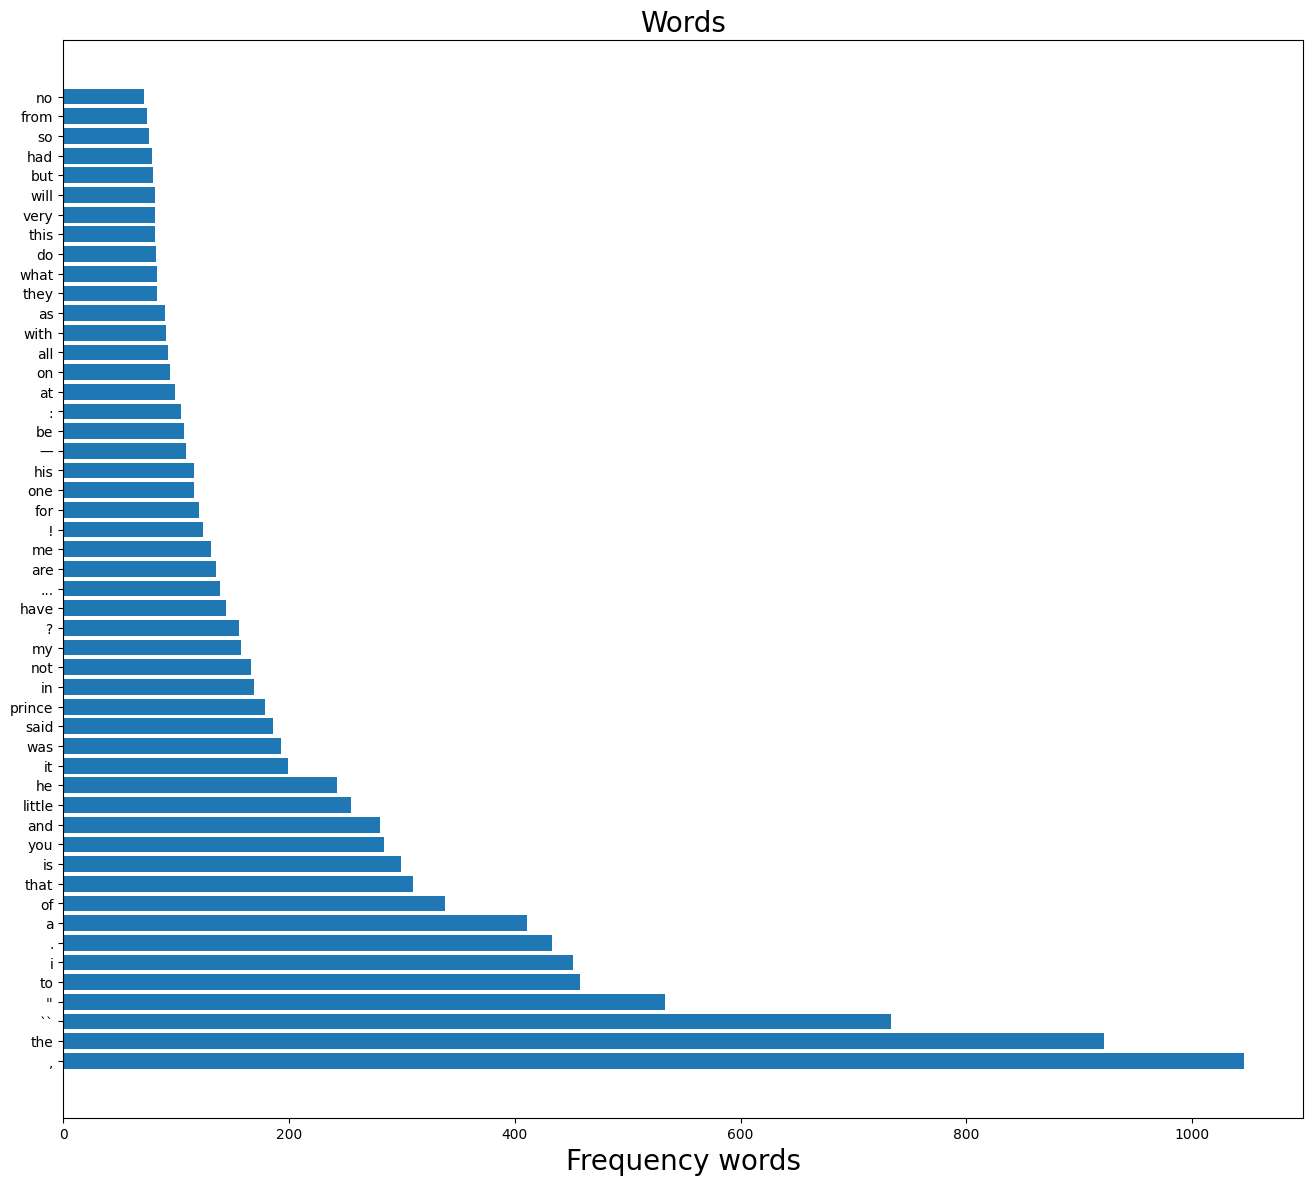

In [41]:
fig, ax = plt.subplots(figsize=(16, 14))

ax.barh(y=y, width=x)
ax.set_title('Words', fontsize=20)
ax.set_xlabel('Frequency words', fontsize=20)

## Коэффициент разнообразия

Коэффициент лексического разнообразия текста рассчитывается как количество уникальных слов делённое на общее количество слов:

In [42]:
word_count = len(word_tokenize(text))

In [43]:
len(word_dict)/word_count

0.13811508743391623

Количество отдельных слов составляет около **4.8%** от общего количества слов, или можно было бы предположить, что в среднем каждое слово должно было использовано **20** раз.

Найдем среднюю длину предложений:

In [44]:
word_count//len(sent_tokenize(text))

30

Средняя длина слова:

In [45]:
len_text//word_count

4

Вычислим коэффициенты частоты имен главных героев:

In [46]:
count_Prince = round(word_dict['prince']/word_count, 4)*100
count_Rose = round(word_dict['rose']/word_count, 4)*100
count_Fox = round(word_dict['fox']/word_count, 4)*100

In [47]:
print(f'Frequency of Prince: {count_Prince}')
print(f'Frequency of Rose: {count_Rose}')
print(f'Frequency of Fox: {count_Fox}')

Frequency of Prince: 0.91
Frequency of Rose: 0.06999999999999999
Frequency of Fox: 0.16


Имя главно героя серии книг встречается чаще, чем другие имена.

## Токенизация

**Токенизация** (иногда – сегментация) по предложениям – это процесс разделения письменного языка на предложения-компоненты. 

Проведем токенезацию по предложениям:

In [55]:
sent_token = sent_tokenize(text)
sent_token[:5]

['ionce when i was six years old i saw a magnificent picture in a book, called true stories from nature, about the primeval forest.it was a picture of a boa constrictor in the act of swallowing an animal.here is a copy of the drawing.boain the book it said:"boa constrictors swallow their prey whole, without chewing it.after that they are not able to move, and they sleep through the six months that they need for digestion.',
 '"i pondered deeply, then, over the adventures of the jungle.',
 'and after some work with a colored pencil i succeeded in making my first drawing.my drawing number one.it looked something like this:sombreroi showed my masterpiece to the grown-ups, and asked them whether the drawing frightened them.but they answered: "frighten?',
 'why should any one be frightened by a hat?',
 '"my drawing was not a picture of a hat.it was a picture of a boa constrictor digesting an elephant.but since the grown-ups were not able to understand it, i made another drawing: i drew the 

Количество предложений

In [56]:
len(sent_token)

646

Токенизация по словам:

In [57]:
word_token = word_tokenize(text)
word_token[:20]

['ionce',
 'when',
 'i',
 'was',
 'six',
 'years',
 'old',
 'i',
 'saw',
 'a',
 'magnificent',
 'picture',
 'in',
 'a',
 'book',
 ',',
 'called',
 'true',
 'stories',
 'from']

Количество слов в тексте:

In [58]:
len(word_token)

19672

## Стоп-слова

Стоп-слова - это слова, которые исключаются из текста перед или после его обработки. При использовании машинного обучения для анализа текстов такие слова могут добавлять много шума, поэтому нужно удалять нерелевантные слова. Стоп-слова обычно включают артикли, междометия, союзы, и т.д., которые не несут смысловой нагрузки. Тем не менее, следует понимать, что нет универсального списка стоп-слов, исключение слов зависит от конкретной задачи.

Выведем список английских стоп-слов из библиотеки:

In [60]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [61]:
stop_words = set(stopwords.words("english"))
print(stop_words)

{'yourselves', 're', 'where', 'other', "couldn't", 'are', 'my', 'wasn', "didn't", 'until', 'from', "it's", "isn't", 'her', 'further', 'having', 'some', 'between', 'an', 'our', "don't", 'over', "you've", 'does', 'with', 'about', 'too', 'be', 'him', 'shan', 'will', 'because', "shouldn't", 'that', 'few', 'i', 'do', 'whom', 'during', 'ma', 'in', 'each', 'am', 'ours', 'these', 'them', 'a', 'ourselves', 'needn', 'more', 'why', 'such', 'aren', 'after', 'were', 'and', 'before', 'same', 'they', 'the', 'all', 'mustn', 'herself', 'if', 'your', 'most', "shan't", 'against', 'both', 'very', 'who', 'up', 'll', "mightn't", 'themselves', 'shouldn', 'had', 'this', 'there', 'don', 'what', 'ain', 'then', 'me', "you'd", 'yours', 'did', 'once', 'itself', 't', 'its', 'has', 'm', 'now', "hadn't", 've', 'o', 'is', 'weren', 'through', 'he', 'didn', 'theirs', 'd', 'doing', 'again', 'himself', 'while', 'down', 'above', 'mightn', 'myself', 'for', 'any', 'by', 'couldn', 'nor', 'than', 'at', 'doesn', 'when', 'isn', 

Знаки пунктуации:

In [62]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [63]:
stop_words = stop_words.union(set(punctuation))

Проведем обработку для нашего текста:

In [64]:
filtered_sentes = []
for sent in sent_token:
    tmp_sentes = []
    sent = sent.split()
    for word in sent:
        if word not in stop_words:
            for symb in punctuation:
                word = word.replace(symb, ' ')
            tmp_sentes.append(word)
    filtered_sentes.append(' '.join(tmp_sentes))
filtered_sentes[:5]

['ionce six years old saw magnificent picture book  called true stories nature  primeval forest it picture boa constrictor act swallowing animal here copy drawing boain book said  boa constrictors swallow prey whole  without chewing it after able move  sleep six months need digestion ',
 ' i pondered deeply  then  adventures jungle ',
 'work colored pencil succeeded making first drawing my drawing number one it looked something like this sombreroi showed masterpiece grown ups  asked whether drawing frightened them but answered   frighten ',
 'one frightened hat ',
 ' my drawing picture hat it picture boa constrictor digesting elephant but since grown ups able understand it  made another drawing  drew inside boa constrictor  grown ups could see clearly they always need things explained my drawing number two looked like this boathe grown ups  response  time  advise lay aside drawings boa constrictors  whether inside outside  devote instead geography  history  arithmetic  grammar that why

In [65]:
filtered_word = []
for word in word_token:
    if word not in stop_words:
        filtered_word.append(word)
filtered_word[:20]

['ionce',
 'six',
 'years',
 'old',
 'saw',
 'magnificent',
 'picture',
 'book',
 'called',
 'true',
 'stories',
 'nature',
 'primeval',
 'forest.it',
 'picture',
 'boa',
 'constrictor',
 'act',
 'swallowing',
 'animal.here']

Количество слов до фильтрации:

In [66]:
print(f'Unique words: {len(set(word_token))}')
print(f'All words: {len(word_token)}')

Unique words: 2717
All words: 19672


После фильтрации:

In [67]:
print(f'Unique words: {len(set(filtered_word))}')
print(f'All words: {len(filtered_word)}')

Unique words: 2589
All words: 8929


Частотный график встречаемости слов в тексте после фильтрации:

In [68]:
word_dict = FreqDist(filtered_word)

In [69]:
word_dict.pop("''")
word_dict.pop("``")

word_dict = dict(sorted(word_dict.items(), key = lambda item: item[1], reverse=True))

In [70]:
x = list(word_dict.values())[:50]
y = list(word_dict.keys())[:50]

Text(0.5, 0, 'Frequency words')

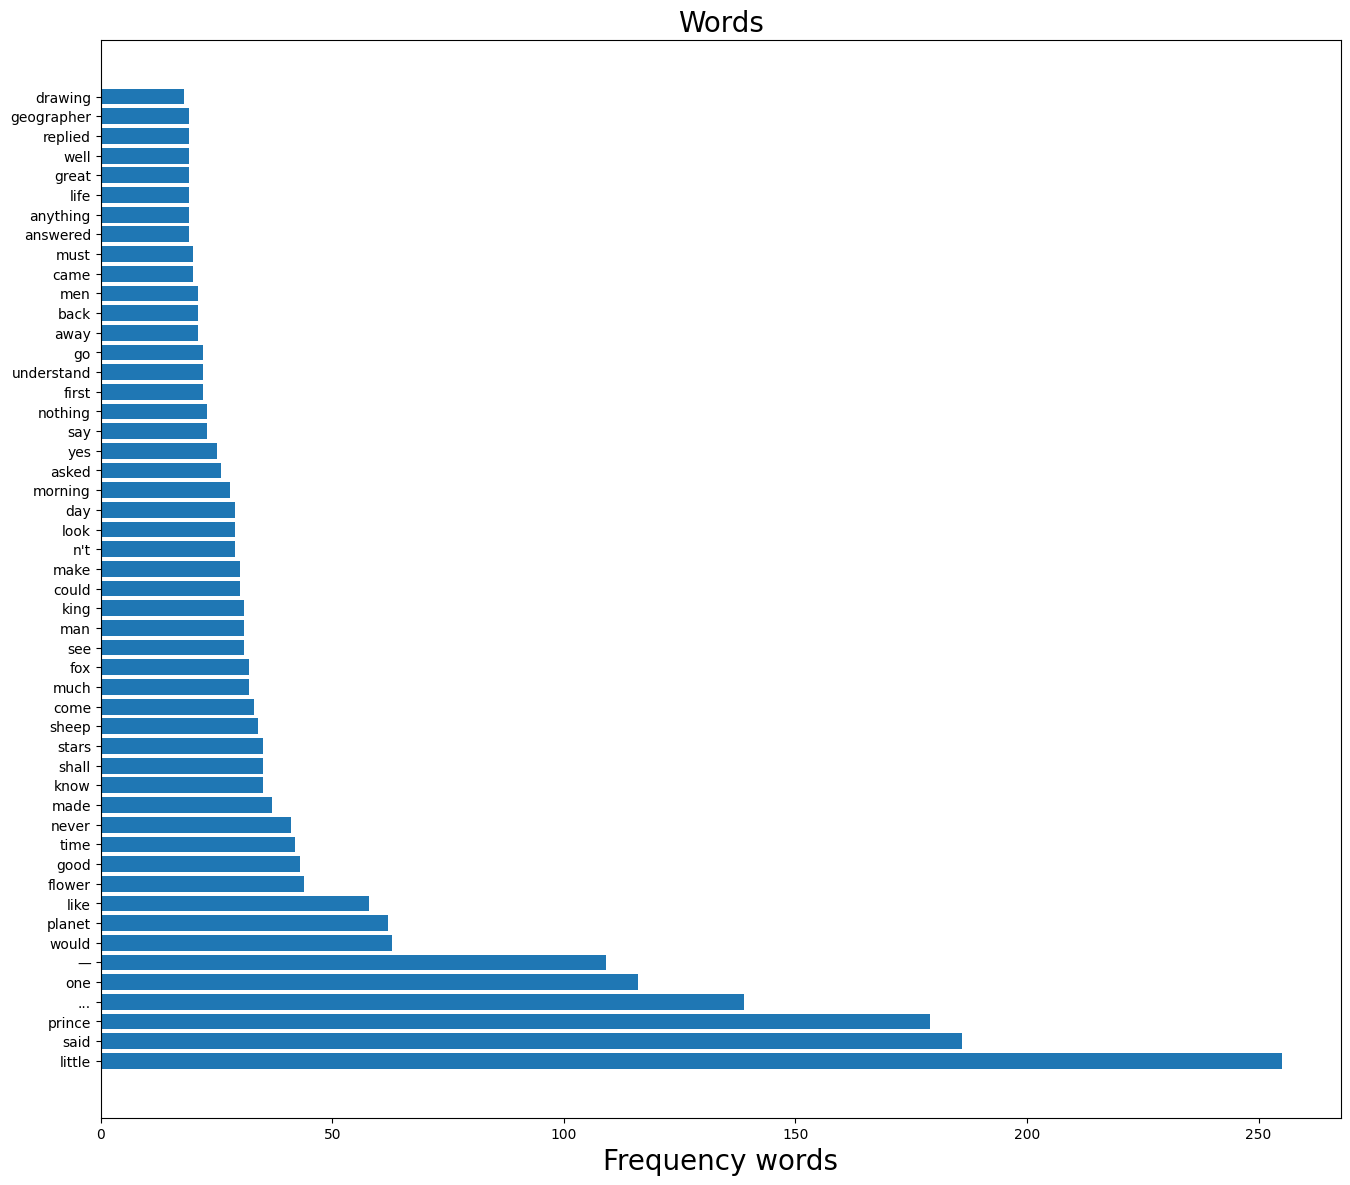

In [71]:
fig, ax = plt.subplots(figsize=(16, 14))

ax.barh(y=y, width=x)
ax.set_title('Words', fontsize=20)
ax.set_xlabel('Frequency words', fontsize=20)

## Лемматизация

**Лемматизация** - процесс приведения слова к его начальной форме. Более точная обработка, но и вычислительно сложнее, чем процесс стеммизации.

In [72]:
lemmtizer = WordNetLemmatizer()

In [74]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [75]:
lemm_words = [lemmtizer.lemmatize(word) for word in filtered_word]
lemm_words[:20]

['ionce',
 'six',
 'year',
 'old',
 'saw',
 'magnificent',
 'picture',
 'book',
 'called',
 'true',
 'story',
 'nature',
 'primeval',
 'forest.it',
 'picture',
 'boa',
 'constrictor',
 'act',
 'swallowing',
 'animal.here']

In [76]:
print(f'Unique words: {len(set(lemm_words))}')
print(f'All words: {len(lemm_words)}')

Unique words: 2454
All words: 8929


Построим частотный график для результата лемматизации:

In [77]:
lemm_dict = FreqDist(lemm_words)

In [82]:
lemm_dict = dict(sorted(lemm_dict.items(), key = lambda item: item[1], reverse=True))

In [83]:
x = list(lemm_dict.values())[:50]
y = list(lemm_dict.keys())[:50]

Text(0.5, 0, 'Frequency lemms')

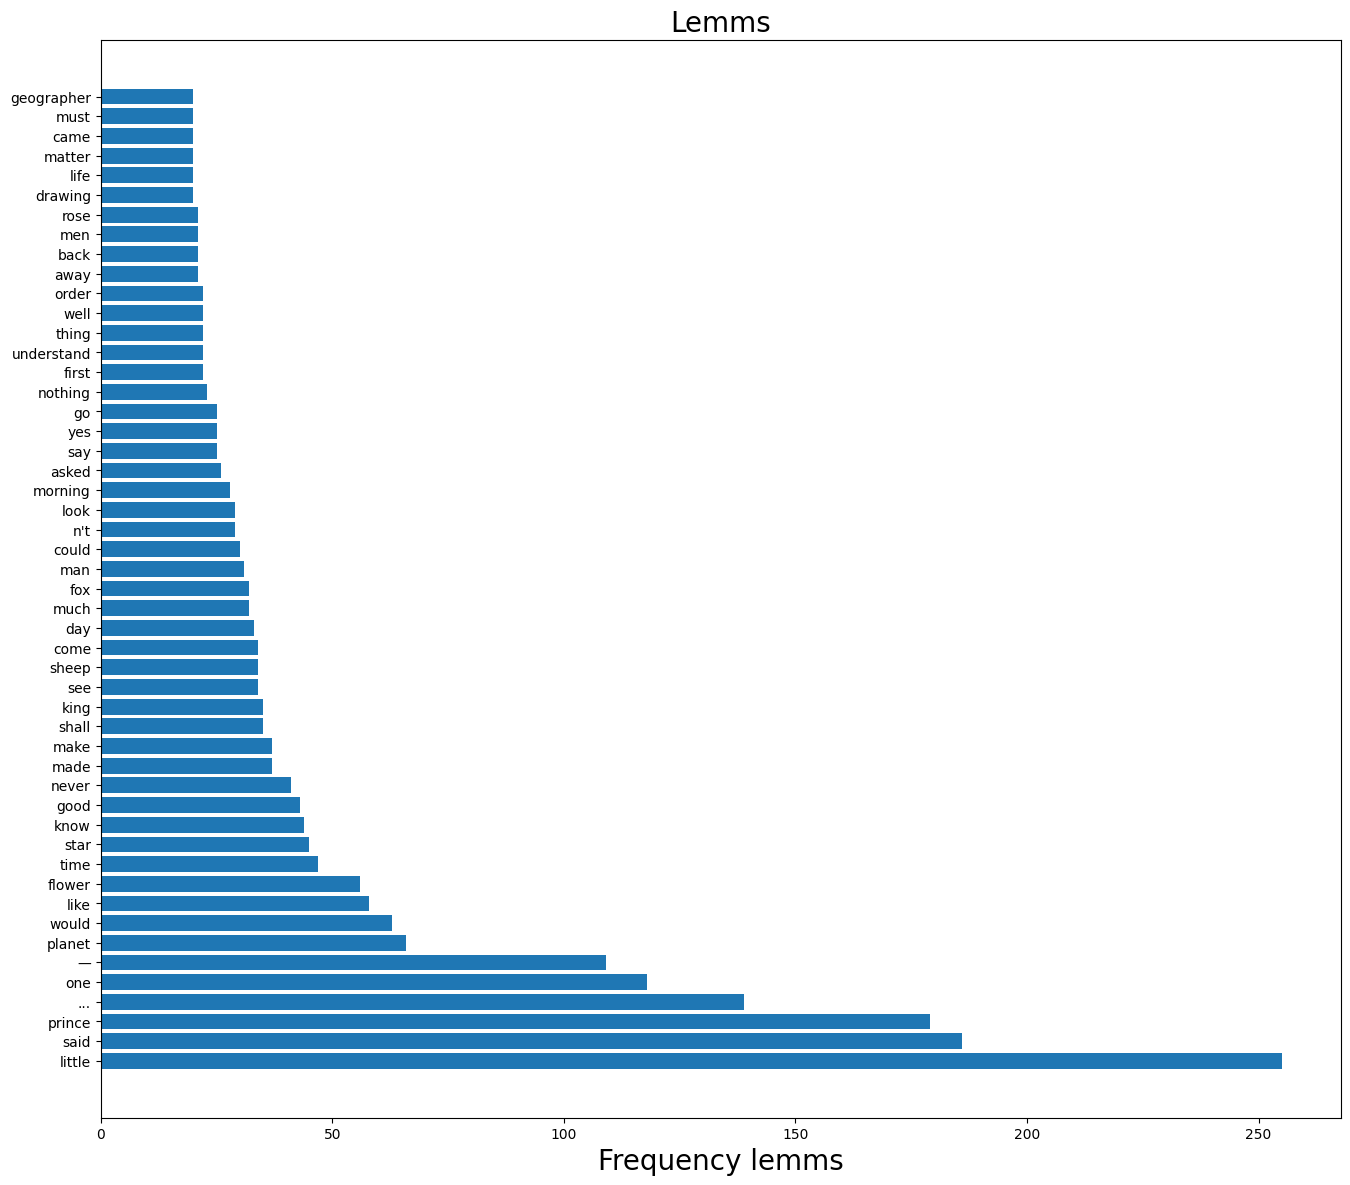

In [84]:
fig, ax = plt.subplots(figsize=(16, 14))

ax.barh(y=y, width=x)
ax.set_title('Lemms', fontsize=20)
ax.set_xlabel('Frequency lemms', fontsize=20)

## Графическая интерпретация

Графики дисперсии самых частых слов:

<Axes: title={'center': 'Lexical Dispersion Plot'}, xlabel='Word Offset'>

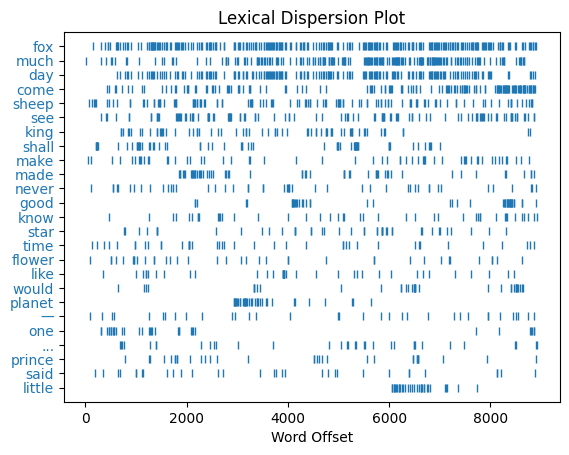

In [85]:
nltk.draw.dispersion.dispersion_plot(lemm_words, y[:25])

<Axes: title={'center': 'Lexical Dispersion Plot'}, xlabel='Word Offset'>

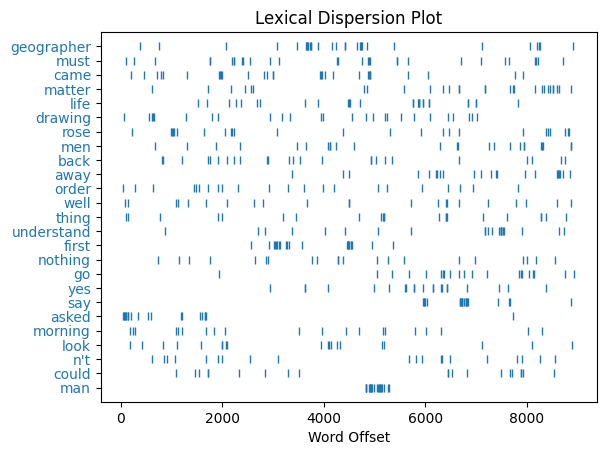

In [86]:
nltk.draw.dispersion.dispersion_plot(lemm_words, list(lemm_dict.keys())[25:50])

Построим для этих лемм кумулятивный график частотного распределения слов:

In [88]:
names = ["prince", "rose", "fox", "geographer", "planet", "king"]
action = ["much", "day", "come", "sheep", "see", "shall", "make", "made", 
          "never", "good", "know", "star", "time", "flower", "like", "would", 
          "one", "said", "little", "must", "came", "matter", "life", "drawing", 
          "rose", "men", "back", "away", "order", "well", "thing", "understand", 
          "first", "nothing", "go", "yes", "say", "asked", "morning", "look", 
          "n't", "could", "man"]

In [89]:
step = len(lemm_words)//180

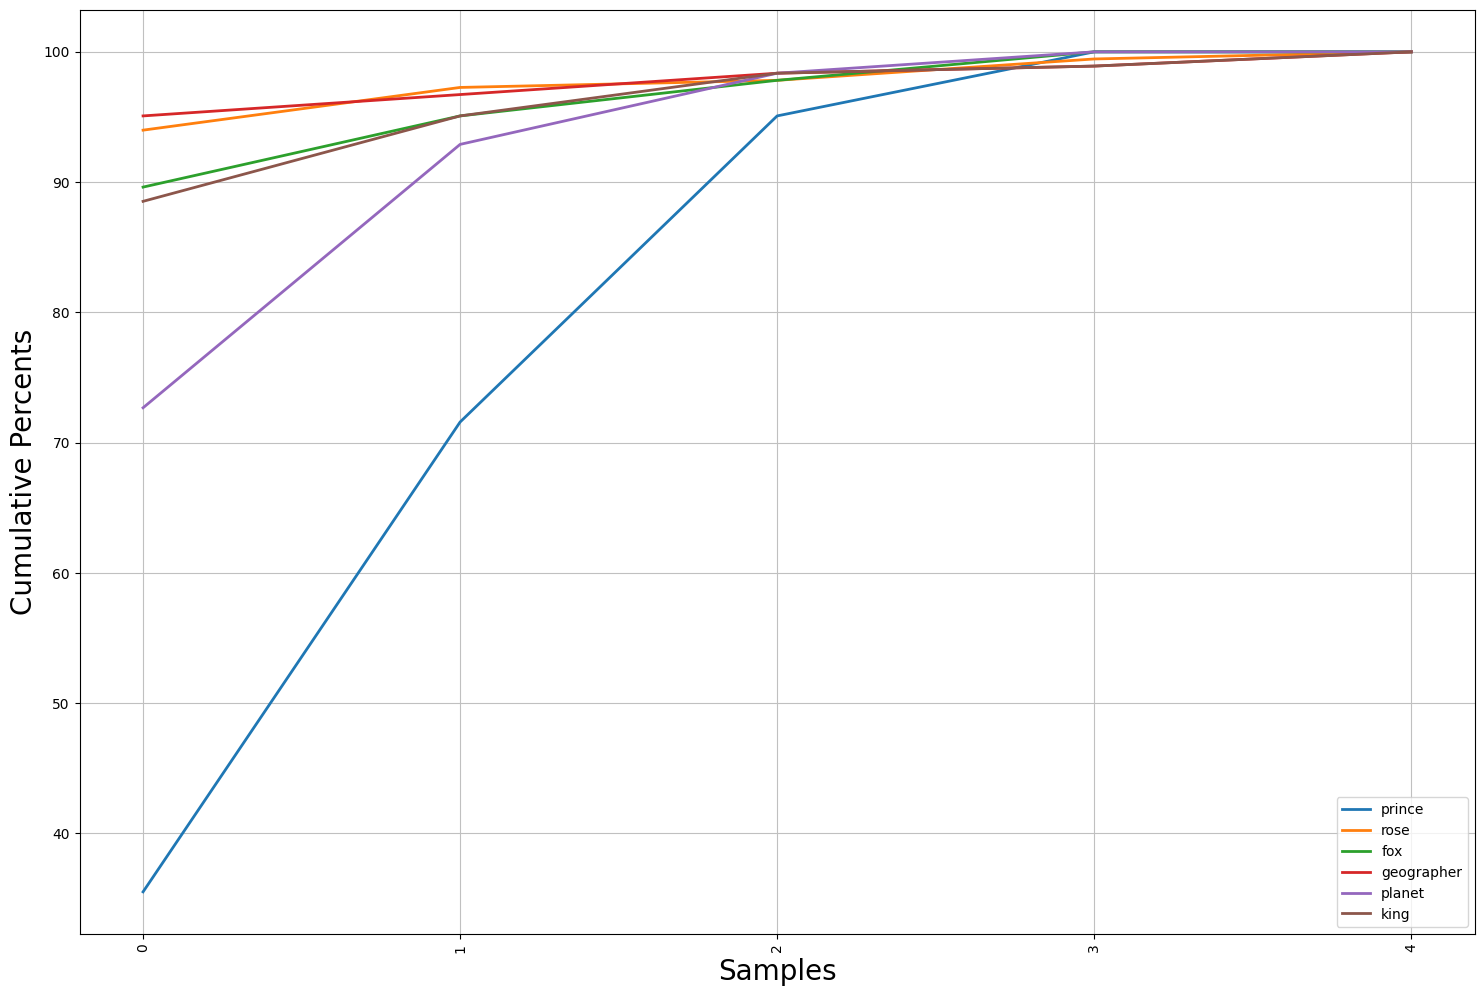

<Axes: xlabel='Samples', ylabel='Cumulative Percents'>

In [90]:
fig, ax = plt.subplots(figsize=(18, 12))
names_plot = nltk.ConditionalFreqDist((name, lemm_words[x-step if x!= 0 else 0:x].count(name)) 
                                      for name in names
                                      for x in range(0, len(lemm_words), step))
ax.set_xlabel('Samples', fontsize = 20)
ax.set_ylabel('Cummulative Percents', fontsize = 20)
names_plot.plot(cumulative=True, percents=True)

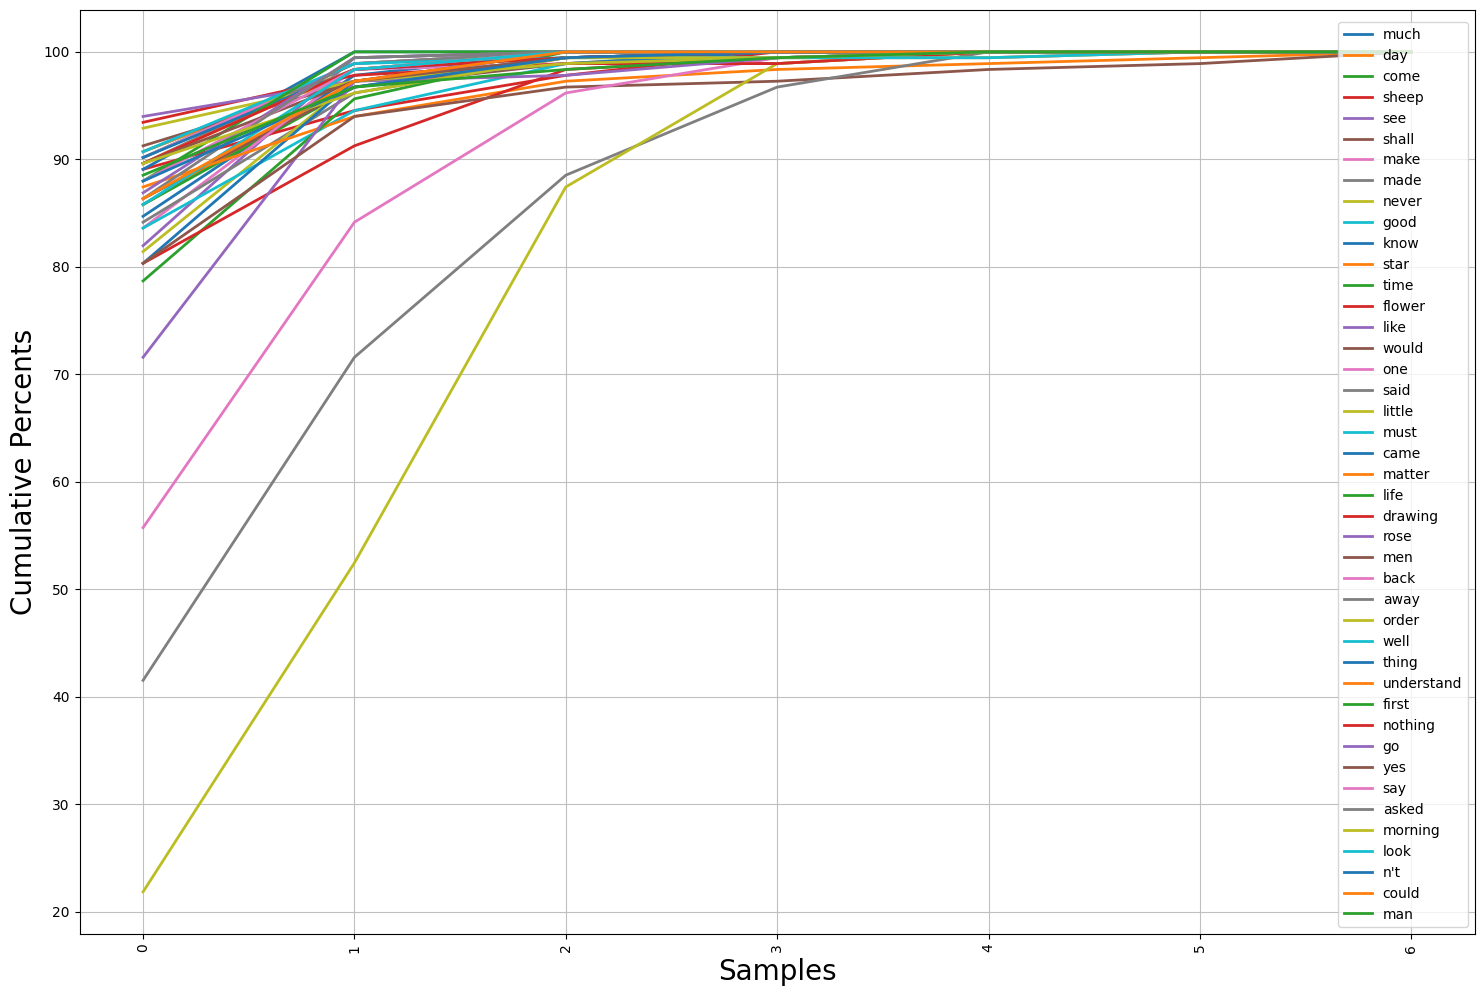

<Axes: xlabel='Samples', ylabel='Cumulative Percents'>

In [92]:
fig, ax = plt.subplots(figsize=(18, 12))
names_plot = nltk.ConditionalFreqDist((act, lemm_words[x-step if x!= 0 else 0:x].count(act)) 
                                      for act in action
                                      for x in range(0, len(lemm_words), step))
ax.set_xlabel('Samples', fontsize = 20)
ax.set_ylabel('Cummulative Percents', fontsize = 20)
names_plot.plot(cumulative=True, percents=True)

## Биграммы

**Биграмма** — это два слова, которые в тексте являются соседними.

Сделаем биграммы для исходных предложений и создадим словарь, в котором будем хранить уникальные биграммы и их количество:

In [93]:
bigram = [list(nltk.bigrams(bi.split()))for bi in filtered_sentes]
bi_dict = {}

In [94]:
for sent in range(0, len(bigram)):
    for bi in range(0, len(bigram[sent])):
        bigrm = ' '.join(bigram[sent][bi])
        if bigrm not in bi_dict:
            bi_dict[bigrm] = 0
        bi_dict[bigrm] += 1

In [95]:
bi_dict = dict(sorted(bi_dict.items(), key = lambda item: item[1], reverse=True))

In [96]:
def bigramm_list(word: str) -> dict():
    result = dict()
    for key, value in bi_dict.items():
        if word in key:
            result[key] = value
        if len(result) == 30:
            return result
    return result

In [97]:
bigrams_names = [bigramm_list('prince'), bigramm_list('rose'), bigramm_list('fox')]

In [98]:
names = ["prince", "rose", "fox", "geographer", "planet", "king"]

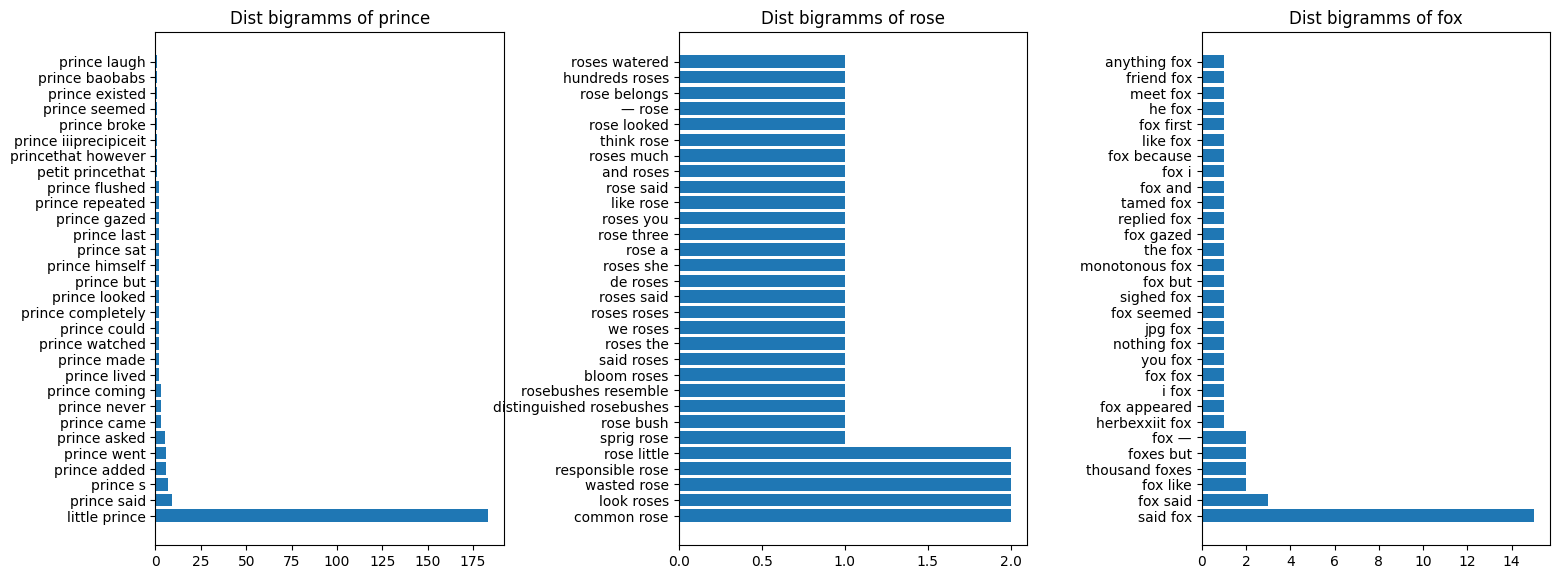

In [99]:
plt.figure(1 , figsize = (18, 14))
n = 0
for bigrm, name in zip(bigrams_names, names):
    n += 1
    plt.subplot(2 , 3 , n)
    plt.subplots_adjust(hspace = 0.1, wspace = 0.5)
    plt.barh(y=list(bigrm.keys()), width=list(bigrm.values()))
    plt.title('Dist bigramms of {}'.format(name))
plt.show()

In [100]:
bigrams_word = [bigramm_list('said'), bigramm_list('back'), bigramm_list('could'),
                bigramm_list('one'), bigramm_list('would'), bigramm_list('around'),
                bigramm_list('looked'), bigramm_list('like'), bigramm_list('got')]

In [101]:
words = ['said', 'back', 'could', 'one', 'would', 
         'around', 'looked', 'like', 'got']

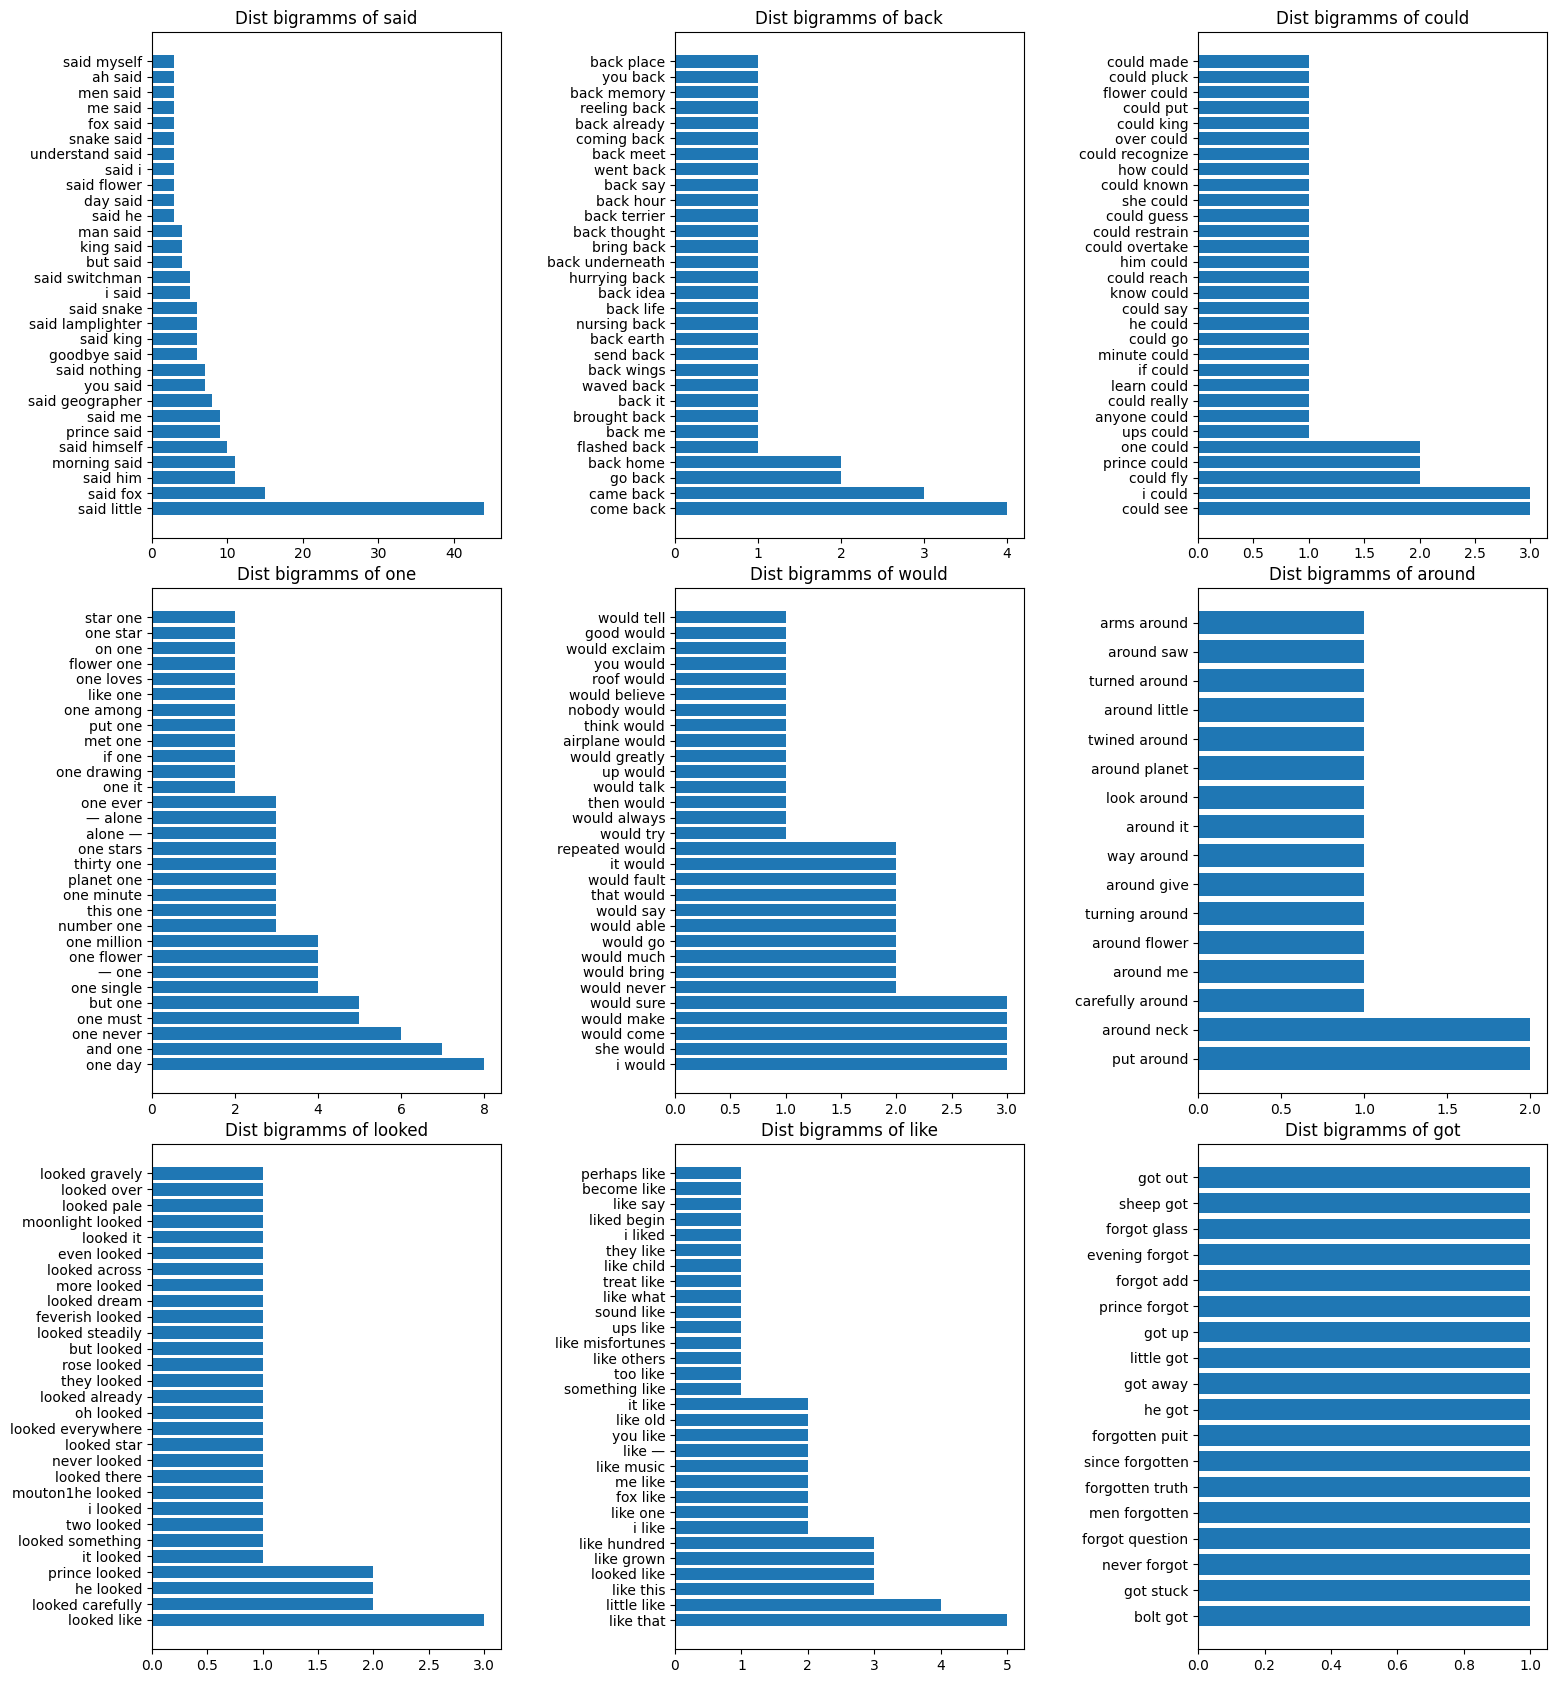

In [102]:
plt.figure(1 , figsize = (18, 21))
n = 0
for bigrm, word in zip(bigrams_word, words):
    n += 1
    plt.subplot(3 , 3 , n)
    plt.subplots_adjust(hspace = 0.1, wspace = 0.5)
    plt.barh(y=list(bigrm.keys()), width=list(bigrm.values()))
    plt.title('Dist bigramms of {}'.format(word))
plt.show()

## Грамматика

In [141]:
grammar = nltk.CFG.fromstring("""
    S -> NP VP
    PP -> P NP
    VP -> V NP | V NP PP | VP PP
    NP -> "prince" | "fox" | "rose" | Det N | Det N PP | NP PP
    Det -> "the" | "a" | "an" | "my" | "that" | "is" | "I"
    V -> "how" | "made" | "little"
    N -> "planet" | "dream" | "acquaintance"
    P -> "and" | "of"
""")

In [142]:
sentence = "and that is how I made the acquaintance of the little prince.".split()
parser = nltk.RecursiveDescentParser(grammar)
for tree in parser.parse(sentence):
  print(tree)

ValueError: ignored